## Создание дашборда по пользовательским событиям для агрегатора новостей

Используя данные Яндекс.Дзен требуется разработать дашборд, который будет отражать взаимодействие пользователей с карточками статей. Этот инструмент будут использовать менеджеры по анализу контента, им необходима следующая информация:

- Cколько взаимодействий пользователей с карточками происходит. Результат разбивается по темам карточек;
- Сколько карточек генерируют источники с разными темами;
- Соотношение темы карточек и темы источников


## Составление технического задания

По итогу запросов было сформулировано и согласовано техзадание и определен макет дашборда.

Состав данных для дашборда:

- История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
- Разбивка событий по темам источников;
- Таблица соответствия тем источников темам карточек;

По каким параметрам данные должны группироваться:

- Дата и время;
- Тема карточки;
- Тема источника;
- Возрастная группа;

Характер данных:
- История событий по темам карточек — абсолютные величины с разбивкой по минутам;
- Разбивка событий по темам источников — относительные величины (% событий);
- Соответствия тем источников темам карточек - абсолютные величины;

Важность: все графики имеют равную важность;

Источники данных для дашборда: cырые данные о событиях взаимодействия пользователей с карточками (таблица log_raw);
База данных, в которой будут храниться агрегированные данные: дополнительные агрегированные таблицы в БД zen;
Частота обновления данных: один раз в сутки, в полночь по UTC;


Макет дашборда:

![Image](https://pictures.s3.yandex.net/resources/Untitled_-_2020-07-06T160925.436_1594041010.png)

### Вывод 

Техническое задание составлено, определен состав дашборда, его внешний вид и набор отображаемых данных.

## Получение и предобработка данных

In [2]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
from IPython.display import Image
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
# коннекция к базе
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])
# подключение к базе
engine = create_engine(connection_string)

In [4]:
# получаем сырые данные
query = ''' SELECT * 
                FROM dash_visits 
            '''
data2 = pd.io.sql.read_sql(query, con = engine) 

In [5]:
# полученные таблицы
data2

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
...,...,...,...,...,...,...
30740,1071337,Юмор,Финансы,36-40,2019-09-24 18:57:00,2
30741,1071338,Юмор,Финансы,36-40,2019-09-24 19:00:00,1
30742,1071339,Юмор,Финансы,41-45,2019-09-24 18:54:00,1
30743,1071340,Юмор,Финансы,41-45,2019-09-24 18:56:00,1


Данные получены. Проведем проверку.

In [6]:
# Проверка на нулевые значения
data2.isnull().sum()

record_id       0
item_topic      0
source_topic    0
age_segment     0
dt              0
visits          0
dtype: int64

In [7]:
# Проверка на типы данных
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
record_id       30745 non-null int64
item_topic      30745 non-null object
source_topic    30745 non-null object
age_segment     30745 non-null object
dt              30745 non-null datetime64[ns]
visits          30745 non-null int64
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


In [8]:
# Проверка на дубликаты
print('Количество дубликатов:', data2.duplicated().sum())

Количество дубликатов: 0


Выгрузка данных из таблицы dash_visits в файл dash_visits.csv:

In [9]:
data2.to_csv(r'D:\da25_prokh_11_tableu\dash_visits.csv', encoding='utf-8', index=False, header=True)

Для дальнейшей работы над проектом понадобися dash_visits.

### Вывод 

Данные получены из базы, проверены на дубликаты и нулевые значения, их не обнаружено. Данные выгружены в формате csv и готовы для импорта в Tableau.

## Формирование дашборда в Tableau Public

По утвержденному шаблону выполнен дашборд в Tableau.
Представлены следующие графики: 
- История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
- Разбивка событий по темам источников;
- Таблица соответствия тем источников темам карточек;

Для данных доступны фильтры:
- Дата и время;
- Тема карточки;
- Возрастная группа;

Дашборд доступен по ссылке:

https://public.tableau.com/views/yp_11_prokhorova/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

1. Cколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек.

In [10]:
grouped_data_item = data2.groupby(by='item_topic').agg({'visits':'sum'}).sort_values(by='visits', ascending = False)
main_visits = grouped_data_item.iloc[:10]
main_visits

,visits
item_topic,
Наука,21736
Отношения,20666
Интересные факты,19942
Общество,19640
Подборки,17772
Россия,16966
Полезные советы,15435
История,15389
Семья,11897


In [11]:
main_visits = main_visits.reset_index()
main_visits = main_visits['item_topic'].tolist()

In [12]:
# Всего визитов
grouped_data_item.sum()

visits    310207
dtype: int64

In [13]:
grouped_data_item_age = data2.pivot_table(index='item_topic', values='visits', columns='age_segment', aggfunc='sum')

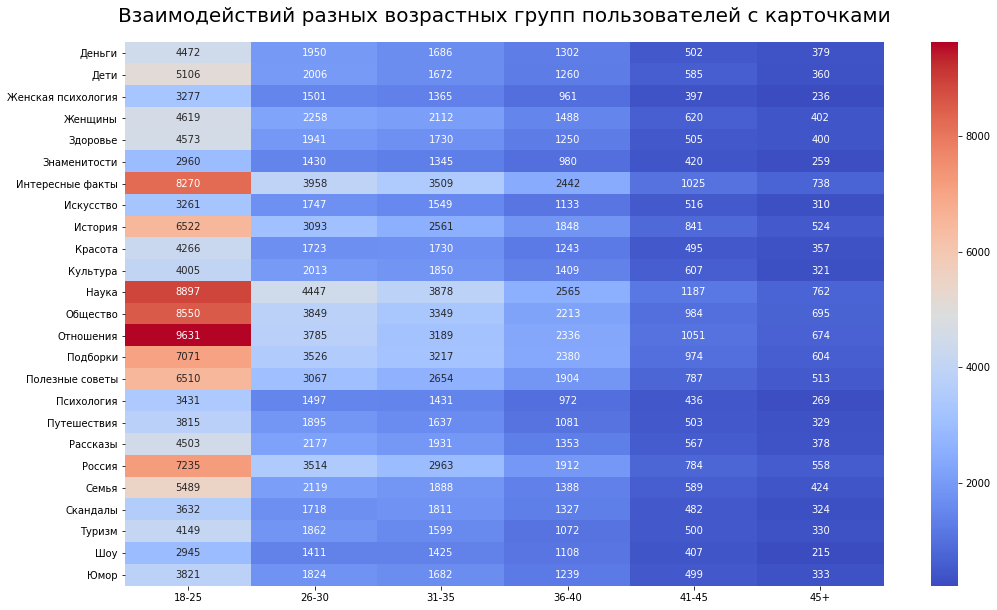

In [14]:
# Тепловая карта с суммой визитов и разбивкой по темам карточек
plt.figure(figsize=(17, 10))
ax = sns.heatmap(grouped_data_item_age, annot=True, fmt='.0f', cmap= "coolwarm")
ax.set_title('Взаимодействий разных возрастных групп пользователей с карточками', fontsize = 20, pad=20)
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

За интервал с 18:28 до 19:00 в сумме лидировало направление карточек Наука(21 тыс.визитов), на втором месте Отношения, потом - Интересные факты. Всего визитов 310207.

Самые активные пользователи — аудитория 18-25, самая интересная тема — Отношения(9631 визита). Чем старше аудитория, тем меньше посещений. Самые популярные темы: Наука, Отношения, Интересные факты.

2. Сколько карточек генерируют источники с разными темами.

In [22]:
grouped_data_source = data2.groupby(by='source_topic').agg({'visits':'sum'}).sort_values(by='visits', ascending = False)
main_source = grouped_data_source.iloc[:10]
main_source

,visits
source_topic,
Семейные отношения,33309
Россия,29831
Полезные советы,27412
Путешествия,24124
Знаменитости,23945
Кино,20084
Дети,15243
История,14628
Семья,13896


In [23]:
main_source = main_source.reset_index()
main_source = main_source['source_topic'].tolist()

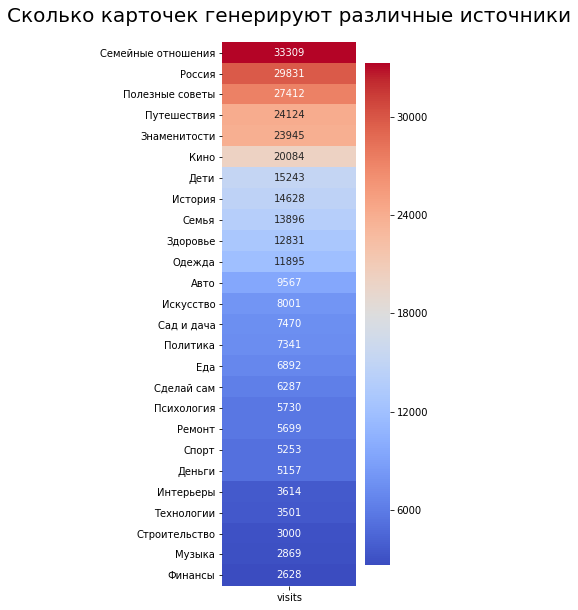

In [17]:
# Тепловая карта с разбивкой по темам источников
plt.figure(figsize=(3, 10))
ax = sns.heatmap(grouped_data_source, annot=True, fmt='.0f', cmap= "coolwarm")
ax.set_title('Сколько карточек генерируют различные источники', fontsize = 20, pad=20)
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

Больше всего карточек генерирует источник с темой Семейные отношения (33,3 тыс. карточек). Далее идут источники Россия (29,8 тыс.)и Полезные советы (27,4 тыс.). Меньше всего карточек генерирует источник Финансы (2,6 тыс).

3. Как соотносятся темы карточек и темы источников

Выберем 10 самых популярных карточек и 10 самых популярных источников и посмотрим пересечение.

In [18]:
grouped_data_item_source = data2.query('source_topic in @main_source').pivot_table(index='item_topic', values='visits', columns='source_topic', aggfunc='sum')
grouped_data_item_source_main = grouped_data_item_source.query('item_topic in @main_visits')

In [19]:
grouped_data_item_source_main

source_topic,Дети,Здоровье,Знаменитости,История,Кино,Полезные советы,Путешествия,Россия,Семейные отношения,Семья
item_topic,,,,,,,,,,
Женщины,875,1022,967,560,340,986,192,397,2270,988
Интересные факты,327,2090,720,1273,1033,2023,1448,2567,1323,611
История,1047,771,921,636,1091,859,2643,1491,1344,696
Наука,930,629,1554,1102,3279,1865,1823,1782,1711,809
Общество,1007,1181,829,1116,578,1313,891,3471,2727,1416
Отношения,242,1173,2040,679,672,2716,1269,2278,1030,194
Подборки,319,396,1353,597,1403,2795,1491,877,1386,424
Полезные советы,707,1346,271,437,143,1413,2088,403,1781,811
Россия,493,282,1579,1104,919,730,1079,2847,1962,608


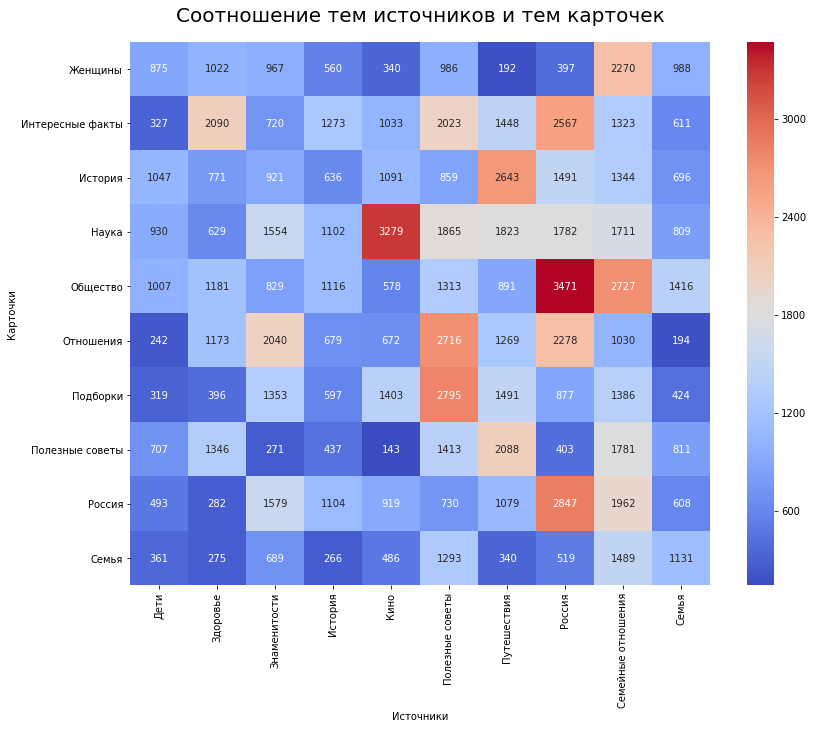

In [20]:
# Тепловая карта по темам источников и темам карточек 
plt.figure(figsize=(13, 10))
ax = sns.heatmap(grouped_data_item_source_main, annot=True, fmt='.0f', cmap= "coolwarm")
ax.set_title('Соотношение тем источников и тем карточек', fontsize = 20, pad=20)
ax.set_ylabel('Карточки')
ax.set_xlabel('Источники')
plt.show()

По самой популярной теме карточек Наука наибольшее число карточек генерирует источник Кино, далее Полезные советы и Путешествия. Похоже, что темы не релевантны друг другу. Для популярной категории карточек Отношения источниками являются, в основном, Полезные советы, далее Россия и Знаменитости. Источниками Интересных фактов в основном считаются Россия, Полезные советы и Здоровье.

### Вывод

Составлен дашборд, проанализировано взаимодействие пользователей с карточками.
По количеству карточек лидирует Наука(21 тыс.визитов), на втором месте Отношения, потом - Интересные факты. Всего визитов 310207.

По самой популярной теме карточек Наука наибольшее число карточек генерирует источник Кино, далее Полезные советы и Путешествия. Для популярной категории карточек Отношения источниками являются, в основном, Полезные советы, далее Россия и Знаменитости. Источниками Интересных фактов в основном считаются Россия, Полезные советы и Здоровье.

Самые активные пользователи — аудитория 18-25, для них самая интересная тема — Отношения (9631 визита). Чем старше аудитория, тем меньше посещений. Самые популярные темы: Наука, Отношения, Интересные факты.

## Вывод


Используя данные Яндекс.Дзен, составлен дашборд, отражающий взяимодействие пользователей с карточками статей. 

Дашборд доступен по ссылке:
https://public.tableau.com/views/yp_11_prokhorova/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link


По количеству карточек лидирует Наука(21 тыс.визитов), на втором месте Отношения (21 тыс.визитов), далее Интересные факты (20 тыс.визитов). По истории событий зафиксировано увеличение посещений 18:52-19:00. Во время 18:35-18:52 по аудитории 45+ зафиксировано только 4 темы (Россия, Подборки, История, Искусство), что привело к смещению процентного отношения на графике "% событий по темам карточек".

Самые активные пользователи — аудитория 18-25, для них самая интересная тема — Отношения(9631 визита). Чем старше аудитория, тем меньше посещений. 

Больше всего карточек генерирует источник с темой Семейные отношения (33,3 тыс. карточек). Далее идут источники Россия (29,8 тыс.) и Полезные советы (27,4 тыс.). Меньше всего карточек генерирует источник Финансы (2,6 тыс).

По самой популярной теме карточек Наука наибольшее число карточек генерируют нерелевантные источники: Кино, Полезные советы и Путешествия. Для популярной категории карточек Отношения источниками являются, в основном, Полезные советы, далее Россия и Знаменитости. Самые крупные источники Интересных фактов: Россия, Полезные советы и Здоровье.

По итогам работы составлена презентация:
https://drive.google.com/file/d/1tjUHULInxMNtWEVRjQduav4PIpfrHtVA/view?usp=sharing